In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.shape

(918, 12)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
#checking outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers=df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)) ]
outliers.isna().sum()


C:\Users\mukesh\AppData\Local\Temp/ipykernel_52008/2404822083.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)) ]


Age               918
Sex               918
ChestPainType     918
RestingBP         890
Cholesterol       735
FastingBS         704
RestingECG        918
MaxHR             916
ExerciseAngina    918
Oldpeak           902
ST_Slope          918
HeartDisease      918
dtype: int64

In [12]:
#removing outliers
df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

C:\Users\mukesh\AppData\Local\Temp/ipykernel_52008/2510998580.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(588, 12)

In [13]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,588.000000,588.000000,588.000000,588.0,588.000000,588.000000,588.000000
mean,51.722789,130.375850,239.064626,0.0,141.755102,0.802211,0.426871
std,9.542500,15.238699,50.738558,0.0,24.144890,0.961727,0.495044
min,28.000000,92.000000,85.000000,0.0,71.000000,-0.100000,0.000000
25%,44.750000,120.000000,205.000000,0.0,124.000000,0.000000,0.000000
50%,52.000000,130.000000,234.000000,0.0,142.000000,0.300000,0.000000
75%,58.000000,140.000000,272.000000,0.0,160.000000,1.500000,1.000000
max,77.000000,170.000000,404.000000,0.0,202.000000,3.600000,1.000000


In [15]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [20]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [17]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [18]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [21]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [22]:
df2 = df1.copy()
df2.ExerciseAngina.replace({'N': 0,'Y': 1},inplace=True)

df2.ST_Slope.replace({'Down': 1,'Flat': 2,'Up': 3},inplace=True)

df2.RestingECG.replace({'Normal': 1,'ST': 2,'LVH': 3},inplace=True)

df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [23]:
df3 = pd.get_dummies(df2, drop_first=True)
df3.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0


In [24]:
X = df3.drop("HeartDisease",axis='columns')
y = df3.HeartDisease

X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0


In [25]:
y

0      0
1      1
2      0
3      1
4      0
      ..
912    1
913    1
915    1
916    1
917    0
Name: HeartDisease, Length: 588, dtype: int64

In [26]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.2295279 ,  0.63209752,  0.9850081 , ...,  1.75594229,
        -0.55115279, -0.2277682 ],
       [-0.28557583,  1.94566296, -1.16508859, ..., -0.5694948 ,
         1.8143789 , -0.2277682 ],
       [-1.54417859, -0.0246852 ,  0.86665415, ...,  1.75594229,
        -0.55115279, -0.2277682 ],
       ...,
       [ 0.55349269, -0.0246852 , -2.13164582, ..., -0.5694948 ,
        -0.55115279, -0.2277682 ],
       [ 0.55349269, -0.0246852 , -0.06045176, ...,  1.75594229,
        -0.55115279, -0.2277682 ],
       [-1.43929503,  0.50074098, -1.26371688, ..., -0.5694948 ,
         1.8143789 , -0.2277682 ]])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)
X_train.shape

(470, 13)

In [28]:
X_test.shape

(118, 13)

In [29]:
# importing all model and check which is true
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [35]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM',SVC(gamma='')))
models.append(("NB",GaussianNB()))

In [36]:
models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('SVM', SVC(gamma='')),
 ('NB', GaussianNB())]

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [41]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

LR: 0.834043
LDA: 0.831915
KNN: 0.829787
DT: 0.731915
SVM: nan
NB: 0.827660


C:\Users\mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mukesh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got '' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mukesh\anaconda3\lib\site-pac

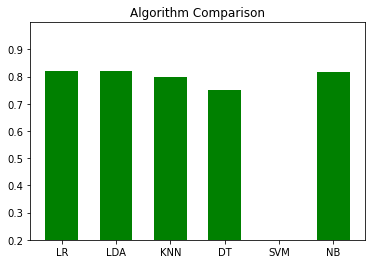

In [101]:
import matplotlib.pyplot as pl
pl.ylim(.200, .999)
pl.bar(names, res, color ='green', width = 0.6)

pl.title('Algorithm Comparison')
pl.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)


0.8983050847457628

In [44]:
#NB is grater than other so we r choosing Nb

In [45]:

model=GaussianNB()

In [46]:
model

GaussianNB()

In [47]:
model.fit(X_train,y_train)

GaussianNB()

In [48]:
y_pred=model.predict(X_test)

In [50]:
# printing confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[67  6]
 [ 5 40]]
Accuracy of the Model: 90.67796610169492%


## PCA

In [52]:
X

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,140,241,0,1,123,1,0.2,2,0,0,0,0
913,45,110,264,0,1,132,0,1.2,2,1,0,0,1
915,57,130,131,0,1,115,1,1.2,2,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,0,1,0,0


In [53]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

array([[  49.8702567 ,  -31.15703971,   10.29048815],
       [ -58.23310201,  -10.56561425,   32.45381464],
       [  43.88375243,   39.70271848,   -9.61455524],
       ...,
       [-107.79906955,   28.24426318,    0.19448697],
       [  -3.14898523,  -30.64941901,    4.74993496],
       [ -64.15850658,  -31.46715938,   11.78544625]])

In [54]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.7542372881355932

In [56]:
## PCA 2 method

In [58]:
sc=StandardScaler()
sc.fit(X_train) #fitting
sc_data=sc.transform(X_train)

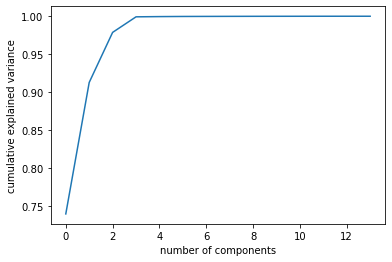

In [61]:
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(df3)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [65]:
df3.shape

(588, 14)

In [62]:
pca=PCA(n_components=3) #refer above diagram where we can see 3 is closer to 100% data so we are taking components=2
pca.fit(sc_data)
X_pca=pca.transform(sc_data)
X_pca

array([[ 2.80039176, -0.39462092, -0.52211536],
       [-0.84055672,  1.54959324, -0.9367771 ],
       [-0.19594967, -0.06706995, -0.73512921],
       ...,
       [-1.85976244, -1.64357337,  0.52506486],
       [ 0.09287076,  0.42777781,  1.73707352],
       [ 0.76103287,  0.12054885,  1.62402241]])

In [63]:
X_pca.shape

(470, 3)

In [66]:
y_train.shape

(470,)

In [67]:
# putting X_pca inplace of x_train and with y_train to fitting again
models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('SVM', SVC(gamma='')),
 ('NB', GaussianNB())]

In [68]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_pca, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

LR: 0.819149
LDA: 0.821277
KNN: 0.800000
DT: 0.751064
SVM: nan
NB: 0.817021


C:\Users\mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mukesh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got '' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mukesh\anaconda3\lib\site-pac

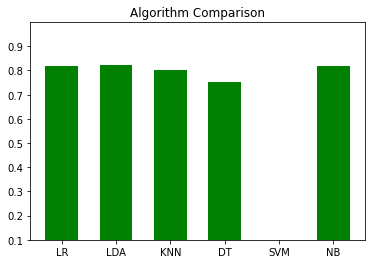

In [69]:
import matplotlib.pyplot as pl
pl.ylim(.100, .999)
pl.bar(names, res, color ='green', width = 0.6)

pl.title('Algorithm Comparison')
pl.show()

In [71]:
model=GaussianNB() # NB is grater then others

In [73]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [74]:
# printing confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[67  6]
 [ 5 40]]
Accuracy of the Model: 90.67796610169492%


In [100]:
# Metrix

In [77]:
import lightgbm as lgb
Model_Parameter={'random_state':0,'learning_rate':0.1,'n_estimator':10}

In [78]:
Model=lgb.LGBMClassifier(**Model_Parameter)

In [79]:
Model.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: n_estimator


LGBMClassifier(n_estimator=10, random_state=0)

In [80]:
Y_pred=Model.predict_proba(X_test)

In [81]:
Y_pred

array([[3.25969420e-02, 9.67403058e-01],
       [9.89178236e-01, 1.08217644e-02],
       [9.76727402e-01, 2.32725985e-02],
       [9.53294894e-01, 4.67051061e-02],
       [7.08900302e-01, 2.91099698e-01],
       [9.90986075e-01, 9.01392484e-03],
       [1.12946049e-01, 8.87053951e-01],
       [1.53983522e-02, 9.84601648e-01],
       [9.95697097e-01, 4.30290338e-03],
       [9.99573610e-01, 4.26389620e-04],
       [7.65743671e-01, 2.34256329e-01],
       [8.85386692e-01, 1.14613308e-01],
       [7.65699888e-01, 2.34300112e-01],
       [4.88093174e-02, 9.51190683e-01],
       [1.20201773e-01, 8.79798227e-01],
       [7.11471949e-01, 2.88528051e-01],
       [9.99797696e-01, 2.02304328e-04],
       [1.88801689e-02, 9.81119831e-01],
       [1.27725361e-01, 8.72274639e-01],
       [9.81026645e-01, 1.89733546e-02],
       [9.95629962e-01, 4.37003837e-03],
       [9.99761104e-01, 2.38895593e-04],
       [9.97741290e-01, 2.25871024e-03],
       [8.68308301e-01, 1.31691699e-01],
       [9.339876

In [82]:
threshold=0.8
Y_pred_classes=Y_pred>threshold

In [83]:
Y_pred_classes

array([[False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False, False],
       [ True, False],
       [False, False],
       [False,  True],
       [False,  True],
       [False, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [Fal

In [84]:
Y_preddf=pd.DataFrame(Y_pred_classes)

In [85]:
Y_preddf.replace({False:0,True:1},inplace=True)

In [88]:
Y_preddf.head(10)

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,0,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [87]:
Y_predict=Y_preddf.iloc[:,1].values
print(Y_predict)

[1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [89]:
from sklearn.metrics import confusion_matrix

In [91]:
Cm=confusion_matrix(y_test,Y_predict)
Cm

array([[71,  2],
       [ 8, 37]], dtype=int64)

In [92]:
tp,fp,fn,tn=Cm.ravel()

In [94]:
#False postive Rate
false_positive_rate = fp / (fp + tn)

#False Negative Rate
false_negative_rate = fn / (tp + fn)

#True Negative Rate
true_negative_rate = tn / (tn + fp)

#Negative Predicted Value
negative_predictive_value = tn/ (tn + fn)

#False Discovery Rate
false_discovery_rate = fp/ (tp + fp)

from sklearn.metrics import recall_score
#True Positive Rate or recall or sensitivity
recall = recall_score(y_test, Y_predict) # or optionally tp
recall

0.8222222222222222

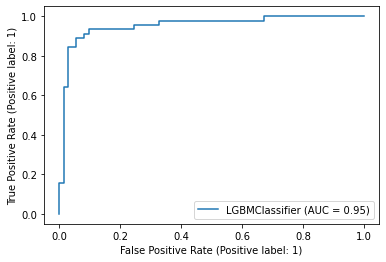

In [96]:
from sklearn.metrics import confusion_matrix, precision_score
precision = precision_score(y_test, Y_predict)
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, Y_predict)
from sklearn.metrics import fbeta_score
fbeta = fbeta_score(y_test, Y_predict, beta=2)
from sklearn.metrics import f1_score
f1= f1_score(y_test, Y_predict)
from sklearn.metrics import cohen_kappa_score,matthews_corrcoef
cohen_kappa = cohen_kappa_score(y_test, Y_predict)
mattherws_corref=matthews_corrcoef(y_test,Y_predict)
from sklearn import metrics
metrics.plot_roc_curve(Model, X_test, y_test)

In [97]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, Y_predict)
from sklearn.metrics import average_precision_score

avg_precision = average_precision_score(y_test, Y_predict)
from sklearn.metrics import log_loss
 
loss = log_loss(y_test, Y_predict)
from sklearn.metrics import brier_score_loss

brier_loss = brier_score_loss(y_test, Y_predict)

In [99]:
print(roc_auc)
print(avg_precision)
print(loss)
print(brier_loss)

0.8974124809741247
0.8478535902264716
2.9270285012200623
0.0847457627118644
